#### Predict if a patient will survive or dies based on the parameters using ML and suggest treatment planning

#### Workflow
+ Data preprocessing
+ EDA
+ Feature selectition
+ Build model
+ Interpret model
+ serialization
+ production with streamlit
  

In [196]:
#Load my data as pd
import pandas as pd
import numpy as np


In [197]:
#Load Data ViZ pkgs
import matplotlib.pyplot as plt
import seaborn as sns


### For reference
+ 1 patient id: 0, 4018
+ 2 Gender:FEMALE, MALE
+ 3 Age at Initial Pathologic Diagnosis:10, 20, 30, 40, 50 ,60
+ 4 ER Status: Negative, Positive, Interdetermint
+ 5 PR Status:Negative, Positive
+ 6 HER2 Final Status:Negative, Positive, E ocal
+ 7 Tumor:T1, T2, T3, T4
+ 8 Tumor--T1 Coded:T_Other, T1
+ 9 Node:N0, N1, N2, N3
+ 10 Node-Coded: Negative, Positive
+ 11 Metastas is: M0, M1
+ 12 Metastasis-Coded: Negative, Positive
+ 13 AJCC Stage:stage I, stage II, stage III, stage IV, Stage IA, Stage IIA, Stage IIIA,  Stage IB, Stage IIB, Stage IIIB, Stage IC, Stage IIC,+ 14  Stage IIIC
+ 14 Converted Stage:No_Conversion,Stage 1, Stage IA, Stage IIA, Stage IIIA, Stage IB, Stage IIB, Stage IIIB, Stage IC, Stage IIC+ 15 , Stage IIIC
+ 15 Survival Data Form: Enrolment , Follow-up
+ 16 Vital Status:DECEASED, LIVING
+ 17 Days to Date of Last Contact:0, 133, 309, 450
+ 18 Days to date of Death: 160, 200, 1148,  NA
+ 19 OS event:0, 1
+ 20 OS Time: 240, 750, 1555, NA
+ 21 Smoker:0, 1
+ 22 HvyAlcoholConsump:0, 1
+ 23 Veggies:0, 1
+ 24 PhysHlth: 14, 15, 30
+ 25 BMI:25, 7, , 28, 30
+ 26 HighBP: 0, 1


In [198]:
#Load my Dataset
df = pd.read_csv("data/RBreast__cancer.csv")

In [199]:
df.head()


,patient_id,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,Days to Date of Last Contact,Days to date of Death,OS event,OS Time,Smoker,HvyAlcoholConsump,BMI,PhysHlth,HighBP,Veggies
0,0.0,FEMALE,40.0,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,240.0,240.0,1.0,240.0,1.0,0.0,40.0,15.0,1.0,1.0
1,2.0,FEMALE,48.0,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,754.0,754.0,1.0,754.0,1.0,0.0,25.0,0.0,0.0,0.0
2,5.0,FEMALE,56.0,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,1555.0,1555.0,1.0,1555.0,0.0,0.0,28.0,30.0,1.0,0.0
3,6.0,FEMALE,38.0,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,1692.0,1692.0,1.0,1692.0,0.0,0.0,27.0,0.0,1.0,1.0
4,8.0,FEMALE,57.0,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,133.0,NaN,0.0,133.0,0.0,0.0,24.0,0.0,1.0,1.0


In [200]:
col_names = [" patient id", " Gender", " Age at Initial Pathologic Diagnosis", " ER Status", " PR Status", " HER2 Final Status", " Tumor", " Tumor--T1 Coded", " Node", " Node-Coded", " Metastasis"
, " Metastasis-Coded ", " AJCC Stage" , "Converted Stage", " Survival Data Form" , " Vital Status", " Days to Date of Last Contact" ," Days to date of Death", " OS event", " OS Time"
," Smoker", " HvyAlcoholConsump", " Veggies" , " PhysHlth", " BMI", " HighBP"]


In [201]:
df = pd.read_csv("data/RBreast__cancer.csv")

In [202]:
df.head()

,patient_id,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,Days to Date of Last Contact,Days to date of Death,OS event,OS Time,Smoker,HvyAlcoholConsump,BMI,PhysHlth,HighBP,Veggies
0,0.0,FEMALE,40.0,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,240.0,240.0,1.0,240.0,1.0,0.0,40.0,15.0,1.0,1.0
1,2.0,FEMALE,48.0,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,754.0,754.0,1.0,754.0,1.0,0.0,25.0,0.0,0.0,0.0
2,5.0,FEMALE,56.0,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,1555.0,1555.0,1.0,1555.0,0.0,0.0,28.0,30.0,1.0,0.0
3,6.0,FEMALE,38.0,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,1692.0,1692.0,1.0,1692.0,0.0,0.0,27.0,0.0,1.0,1.0
4,8.0,FEMALE,57.0,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,133.0,NaN,0.0,133.0,0.0,0.0,24.0,0.0,1.0,1.0


In [203]:
# clean my column names
df.columns

Index(['patient_id', 'Gender', 'Age at Initial Pathologic Diagnosis',
       'ER Status', 'PR Status', 'HER2 Final Status', 'Tumor',
       'Tumor--T1 Coded', 'Node', 'Node-Coded', 'Metastasis',
       'Metastasis-Coded', 'AJCC Stage', 'Converted Stage',
       'Survival Data Form', 'Vital Status', 'Days to Date of Last Contact',
       'Days to date of Death', 'OS event', 'OS Time', 'Smoker',
       'HvyAlcoholConsump', 'BMI', 'PhysHlth', 'HighBP', 'Veggies'],
      dtype='object')

In [204]:
# convert to lowercase
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns = df.columns.str.lower().str.replace('--','_')
df.columns = df.columns.str.lower().str.replace('-','_')

In [205]:
df.head(780)


,patient_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,...,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,smoker,hvyalcoholconsump,bmi,physhlth,highbp,veggies
0,0.0,FEMALE,40.0,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,240.0,240.0,1.0,240.0,1.0,0.0,40.0,15.0,1.0,1.0
1,2.0,FEMALE,48.0,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,754.0,754.0,1.0,754.0,1.0,0.0,25.0,0.0,0.0,0.0
2,5.0,FEMALE,56.0,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,1555.0,1555.0,1.0,1555.0,0.0,0.0,28.0,30.0,1.0,0.0
3,6.0,FEMALE,38.0,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,1692.0,1692.0,1.0,1692.0,0.0,0.0,27.0,0.0,1.0,1.0
4,8.0,FEMALE,57.0,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,133.0,NaN,0.0,133.0,0.0,0.0,24.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,4012.0,FEMALE,62.0,Negative,Positive,Equivocal,T3,T_Other,N2,Positive,...,0.0,NaN,0.0,0.0,0.0,0.0,29.0,0.0,0.0,1.0
776,4015.0,FEMALE,48.0,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,0.0,NaN,0.0,0.0,0.0,0.0,30.0,0.0,0.0,1.0
777,4017.0,FEMALE,67.0,Positive,Negative,Positive,T2,T_Other,N2,Positive,...,7.0,NaN,0.0,7.0,0.0,0.0,41.0,0.0,1.0,1.0
778,4018.0,FEMALE,52.0,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,21.0,160.0,1.0,160.0,0.0,0.0,25.0,0.0,0.0,1.0


In [206]:
# Replace NaN with 0
df = df.replace(np.nan, 0)

In [207]:
df.head(780)

,patient_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,...,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,smoker,hvyalcoholconsump,bmi,physhlth,highbp,veggies
0,0.0,FEMALE,40.0,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,240.0,240.0,1.0,240.0,1.0,0.0,40.0,15.0,1.0,1.0
1,2.0,FEMALE,48.0,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,754.0,754.0,1.0,754.0,1.0,0.0,25.0,0.0,0.0,0.0
2,5.0,FEMALE,56.0,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,1555.0,1555.0,1.0,1555.0,0.0,0.0,28.0,30.0,1.0,0.0
3,6.0,FEMALE,38.0,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,1692.0,1692.0,1.0,1692.0,0.0,0.0,27.0,0.0,1.0,1.0
4,8.0,FEMALE,57.0,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,133.0,0.0,0.0,133.0,0.0,0.0,24.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,4012.0,FEMALE,62.0,Negative,Positive,Equivocal,T3,T_Other,N2,Positive,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,1.0
776,4015.0,FEMALE,48.0,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,1.0
777,4017.0,FEMALE,67.0,Positive,Negative,Positive,T2,T_Other,N2,Positive,...,7.0,0.0,0.0,7.0,0.0,0.0,41.0,0.0,1.0,1.0
778,4018.0,FEMALE,52.0,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,21.0,160.0,1.0,160.0,0.0,0.0,25.0,0.0,0.0,1.0


In [208]:
# Data Types
df.dtypes

patient_id                             float64
gender                                  object
age_at_initial_pathologic_diagnosis    float64
er_status                               object
pr_status                               object
her2_final_status                       object
tumor                                   object
tumor_t1_coded                          object
node                                    object
node_coded                              object
metastasis                              object
metastasis_coded                        object
ajcc_stage                              object
converted_stage                         object
survival_data_form                      object
vital_status                            object
days_to_date_of_last_contact           float64
days_to_date_of_death                  float64
os_event                               float64
os_time                                float64
smoker                                 float64
hvyalcoholcon

In [209]:
# How many columns with object
sum(df.dtypes == 'object')

14

In [210]:
df.columns[df.dtypes == 'object']

Index(['gender', 'er_status', 'pr_status', 'her2_final_status', 'tumor',
       'tumor_t1_coded', 'node', 'node_coded', 'metastasis',
       'metastasis_coded', 'ajcc_stage', 'converted_stage',
       'survival_data_form', 'vital_status'],
      dtype='object')

In [211]:

print(df['gender'].unique())
print(df['er_status'].unique())
print(df['pr_status'].unique())
print(df['her2_final_status'].unique())
print(df['tumor'].unique())
print(df['tumor_t1_coded'].unique())
print(df['node'].unique())
print(df['node_coded'].unique())
print(df['metastasis'].unique())
print(df['metastasis_coded'].unique())
print(df['ajcc_stage'].unique())
print(df['converted_stage'].unique())
print(df['survival_data_form'].unique())
print(df['vital_status'].unique())




['FEMALE' 'MALE' 0]
['Negative' 'Indeterminate' 'Positive' 'PositiveNegative' 0]
['Negative' 'Positive' 0]
['Negative' 'Positive' 'Equivocal' 0]
['T3' 'T2' 'T1' 'T4' 0]
['T_Other' 'T1' 0]
['N3' 'N0' 'N1' 'N2' 0]
['Positive' 'Negative' 0]
['M1' 'M0' 0]
['Positive' 'Negative' 'Metastasis-Coded' 0]
['Stage IV' 'Stage IIA' 'Stage IIB' 'Stage IIIC' 'Stage IA' 'Stage IIIA'
 'Stage IIIB' 'Stage II' 'Stage I' 'Stage III' 'Stage IB' 0]
['No_Conversion' 'Stage IIA' 'Stage IIB' 'Stage I' 'Stage IIIA'
 'Stage IIIC' 'Stage IIIB' 0]
['followup' 'enrollment' 0]
['DECEASED' 'LIVING' 0]


In [212]:
#   ajcc_stage_mapping = {
#     'Stage I': 14, 'Stage II': 1, 'Stage III': 2, 'Stage IV': 3,
#     'Stage IA': 4, 'Stage IIA': 5, 'Stage IIIA': 6, 'Stage IB': 7,
#     'Stage IIB': 8, 'Stage IIIB': 9, 'Stage IC': 10, 'Stage IIC': 11,
#     'Stage IIIC': 12, '0': 13
# }
# Define a dictionary for replacement values for each column
replacement_values = {
  

    'gender': {'FEMALE': 1, 'MALE': 2},
    'er_status': {'Negative': 1, 'Positive': 2, 'Indeterminate':3, 'PositiveNegative':4},
    'pr_status': {'Negative': 1, 'Positive': 2},
    'her2_final_status': {'Negative': 1, 'Positive': 2, 'Equivocal': 3},
    'tumor': {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4},
    'tumor_t1_coded': {'T_Other': 2, 'T1': 1, },
    'node': {'N0': 1, 'N1': 2, 'N2': 3, 'N3': 4},
    'node_coded': {'Positive': 2, 'Negative': 1, },
    'metastasis': {'M0': 1, 'M1': 2},
    'metastasis_coded': {'Positive':4, 'Negative':3, 'Metastasis-Coded':2, },
    'ajcc_stage': {'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4, 'Stage IA':5, 'Stage IIA': 6,'Stage IIIA': 7,  'Stage IB':8, 'Stage IIB':9, 'Stage IIIB':10, 'Stage IC': 11, 'Stage IIC':12 , 'Stage IIIC': 13 },
    'converted_stage': {'No_Conversion':1, 'Stage I':2 ,'Stage IA':3, 'Stage IIA':4, 'Stage IIIA':5, 'Stage IB':6, 'Stage IIB':7, 'Stage IIIB':8, 'Stage IC':9, 'Stage IIC':10, 'Stage IIIC':11},
    'survival_data_form': {'followup' : 1 ,'enrollment' : 2},
    'vital_status': {'DECEASED':1, 'LIVING': 2}
    
}

# Iterate through the columns and apply the replacement
for column, mapping in replacement_values.items():
    df[column] = df[column].replace(mapping)


In [213]:
# casting
# convert from one dt to another
df [['gender', 'er_status', 'pr_status', 'her2_final_status', 'tumor',
       'tumor_t1_coded', 'node', 'node_coded', 'metastasis',
       'metastasis_coded', 'ajcc_stage', 'converted_stage',
       'survival_data_form', 'vital_status']] = df [['gender', 'er_status', 'pr_status', 'her2_final_status', 'tumor',
       'tumor_t1_coded', 'node', 'node_coded', 'metastasis',
       'metastasis_coded', 'ajcc_stage', 'converted_stage',
       'survival_data_form', 'vital_status']].astype(int)

In [214]:
df.dtypes

patient_id                             float64
gender                                   int32
age_at_initial_pathologic_diagnosis    float64
er_status                                int32
pr_status                                int32
her2_final_status                        int32
tumor                                    int32
tumor_t1_coded                           int32
node                                     int32
node_coded                               int32
metastasis                               int32
metastasis_coded                         int32
ajcc_stage                               int32
converted_stage                          int32
survival_data_form                       int32
vital_status                             int32
days_to_date_of_last_contact           float64
days_to_date_of_death                  float64
os_event                               float64
os_time                                float64
smoker                                 float64
hvyalcoholcon

#### narative
+ Most of the data were on objects
+ Two of them were in float

In [215]:
### Count of each row
df.count()

patient_id                             780
gender                                 780
age_at_initial_pathologic_diagnosis    780
er_status                              780
pr_status                              780
her2_final_status                      780
tumor                                  780
tumor_t1_coded                         780
node                                   780
node_coded                             780
metastasis                             780
metastasis_coded                       780
ajcc_stage                             780
converted_stage                        780
survival_data_form                     780
vital_status                           780
days_to_date_of_last_contact           780
days_to_date_of_death                  780
os_event                               780
os_time                                780
smoker                                 780
hvyalcoholconsump                      780
bmi                                    780
physhlth   

In [216]:
# Shape of dataset
df.shape

(780, 26)

In [217]:
### Missing Values
df.isnull().sum()

patient_id                             0
gender                                 0
age_at_initial_pathologic_diagnosis    0
er_status                              0
pr_status                              0
her2_final_status                      0
tumor                                  0
tumor_t1_coded                         0
node                                   0
node_coded                             0
metastasis                             0
metastasis_coded                       0
ajcc_stage                             0
converted_stage                        0
survival_data_form                     0
vital_status                           0
days_to_date_of_last_contact           0
days_to_date_of_death                  0
os_event                               0
os_time                                0
smoker                                 0
hvyalcoholconsump                      0
bmi                                    0
physhlth                               0
highbp          

### EDA
+ Descriptive analytics

In [218]:
df.describe()

,patient_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,...,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,smoker,hvyalcoholconsump,bmi,physhlth,highbp,veggies
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.00000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1420.701282,1.016667,53.630769,1.642308,1.489744,1.283333,2.144872,1.855128,1.796154,1.491026,...,778.156410,130.942308,0.10641,805.957692,0.042308,0.033333,29.050000,5.944872,0.592308,0.756410
std,1361.731771,0.137758,9.422453,0.510737,0.502775,0.475839,0.726033,0.355824,0.973717,0.502800,...,645.935398,434.717544,0.30856,671.227144,0.201419,0.179621,6.184274,10.095604,0.491721,0.429523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,312.750000,1.000000,47.750000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,230.000000,0.000000,0.00000,230.000000,0.000000,0.000000,25.000000,0.000000,0.000000,1.000000
50%,569.500000,1.000000,54.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,631.000000,0.000000,0.00000,643.000000,0.000000,0.000000,28.000000,0.000000,1.000000,1.000000
75%,2922.250000,1.000000,62.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1288.000000,0.000000,0.00000,1305.000000,0.000000,0.000000,32.000000,7.000000,1.000000,1.000000
max,4018.000000,2.000000,69.000000,4.000000,2.000000,3.000000,4.000000,2.000000,4.000000,2.000000,...,2850.000000,2483.000000,1.00000,2850.000000,1.000000,1.000000,59.000000,30.000000,1.000000,1.000000


In [219]:
target_lablel = {"DECEASED":1, "LIVING": 2}

In [220]:
## value counts
df['vital_status'].value_counts()

2    696
1     83
0      1
Name: vital_status, dtype: int64

<Axes: >

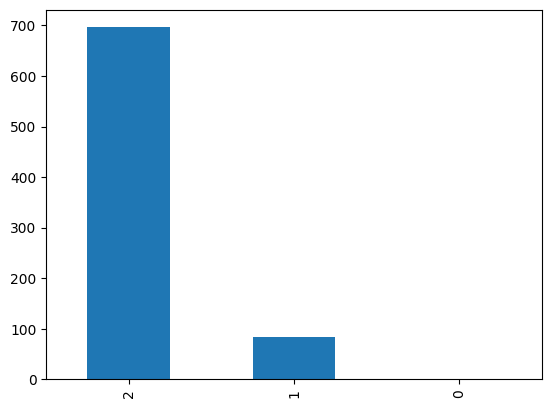

In [221]:
#plot of count
df['vital_status'].value_counts().plot(kind='bar')

In [222]:
### How many are males and females
df['gender'].unique()

array([1, 2, 0])

In [223]:
df['gender'].value_counts()

1    765
2     14
0      1
Name: gender, dtype: int64

<Axes: >

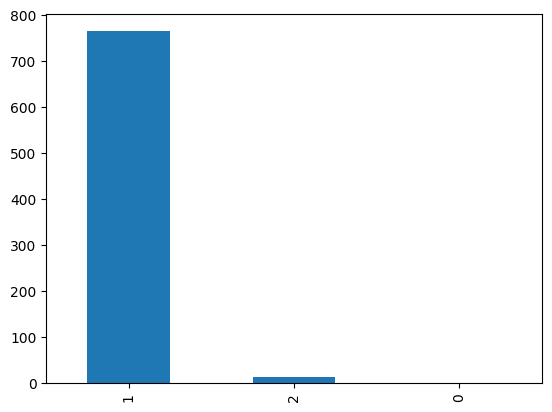

In [224]:
df['gender'].value_counts(). plot(kind='bar')

#### Narative 
+ Almost all of them are Females

In [225]:
### Age Range
df.groupby(['age_at_initial_pathologic_diagnosis','gender']).size()

age_at_initial_pathologic_diagnosis  gender
0.0                                  0          1
30.0                                 1          7
36.0                                 1         13
                                     2          2
37.0                                 1          7
38.0                                 1          6
                                     2          2
39.0                                 1          7
40.0                                 1         28
                                     2          2
41.0                                 1         37
43.0                                 1         24
44.0                                 1          7
45.0                                 1         21
                                     2          2
46.0                                 1         12
                                     2          2
47.0                                 1         15
48.0                                 1         47
49.0  

In [226]:
###Frequency Distribution Table using the Age Range
df['age_at_initial_pathologic_diagnosis'].max()


69.0

In [227]:
import numpy as np

# Extract the values from the column as a NumPy array
age_values = df['age_at_initial_pathologic_diagnosis'].values

# Filter out non-numeric or invalid values (e.g., 0 or negative values)
filtered_age_values = age_values[(age_values > 0)]

# Calculate the minimum value
min_age = np.min(filtered_age_values)

print("Minimum Age:", min_age)


Minimum Age: 30.0


In [228]:
labels = ["30-40", "40-50", "50-60", "60 and more"]
bins= [30,40,50,60,70]
frequency_df = df.groupby(pd.cut(df['age_at_initial_pathologic_diagnosis'],bins=bins,labels=labels)).size()

In [229]:
frequency_df

age_at_initial_pathologic_diagnosis
30-40           67
40-50          212
50-60          268
60 and more    225
dtype: int64

In [230]:
frequency_df = frequency_df.reset_index(name ='count')

In [231]:
frequency_df

,age_at_initial_pathologic_diagnosis,count
0,30-40,67
1,40-50,212
2,50-60,268
3,60 and more,225


<Axes: >

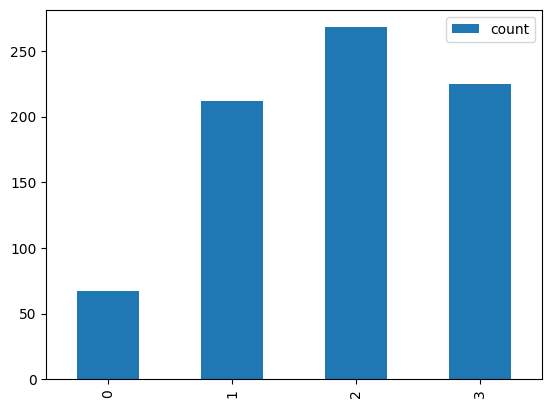

In [232]:
frequency_df.plot(kind='bar')

<Axes: >

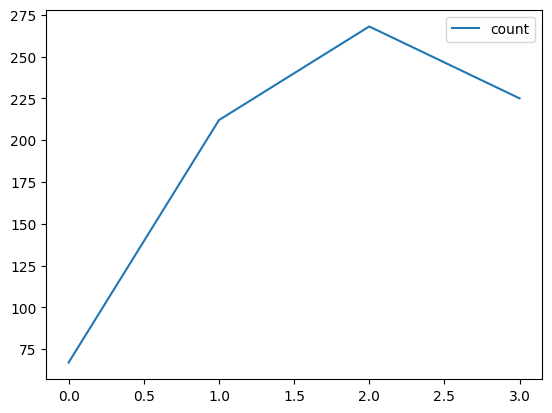

In [233]:
frequency_df.plot(kind='line')

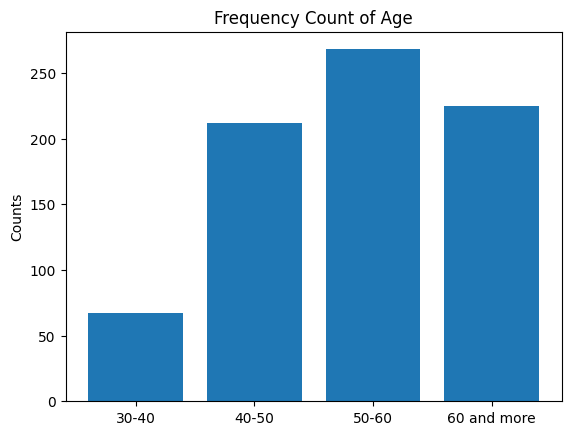

In [234]:
## plot of frequency Table
plt.bar(frequency_df['age_at_initial_pathologic_diagnosis'],frequency_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

#### Narative 
+ Highest prevalence of Breast cancer if from 50-60 followed by 60 and more than that
+ The least is 30-40 and 40-50

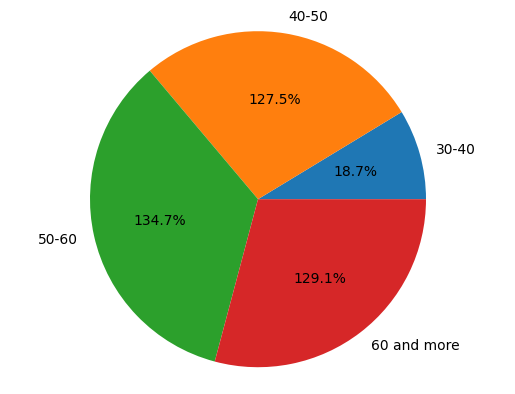

In [235]:
## pie chart
labels = ["30-40", "40-50", "50-60", "60 and more"]
fig1, ax1= plt.subplots()
ax1.pie(frequency_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

### checking for outliers
+ Univariate Analysis
+ Multivariate Analysis

#### Methods
+ Boxplot(uni)
+ Scatterplot (Multi)
+ Z- score
+ IQR Interquartile Range

In [236]:
# Using Boxplot for Univariate outlier Detection
import seaborn as sns


<Axes: >

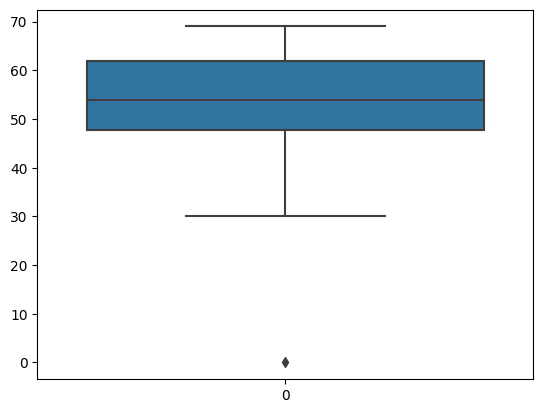

In [237]:
sns.boxplot(df['age_at_initial_pathologic_diagnosis'])

<Axes: >

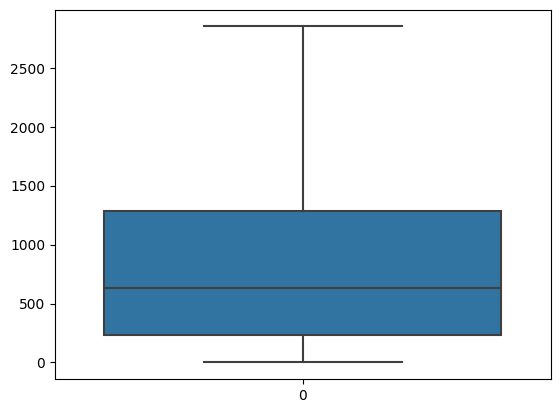

In [238]:
sns.boxplot(df['days_to_date_of_last_contact'])

Outliers:
     patient_id  gender  age_at_initial_pathologic_diagnosis  er_status  \
779         0.0       0                                  0.0          0   

     pr_status  her2_final_status  tumor  tumor_t1_coded  node  node_coded  \
779          0                  0      0               0     0           0   

     ...  days_to_date_of_last_contact  days_to_date_of_death  os_event  \
779  ...                           0.0                    0.0       0.0   

     os_time  smoker  hvyalcoholconsump  bmi  physhlth  highbp  veggies  
779      0.0     0.0                0.0  0.0       0.0     0.0      0.0  

[1 rows x 26 columns]


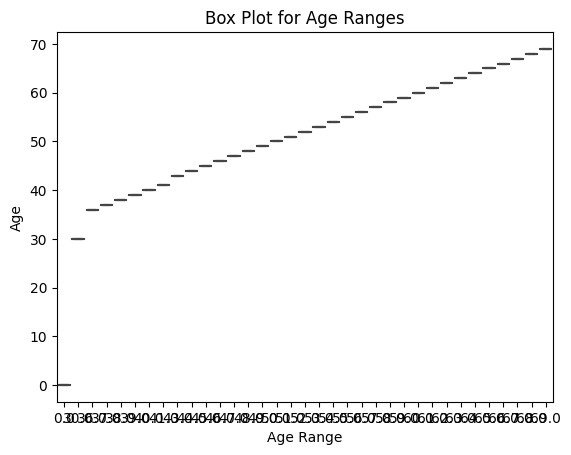

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x=df['age_at_initial_pathologic_diagnosis'], y=df['age_at_initial_pathologic_diagnosis'])

# Calculate the quartiles (Q1 and Q3) and IQR
Q1 = df['age_at_initial_pathologic_diagnosis'].quantile(0.25)
Q3 = df['age_at_initial_pathologic_diagnosis'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age_at_initial_pathologic_diagnosis'] < lower_bound) |
              (df['age_at_initial_pathologic_diagnosis'] > upper_bound)]

# Display the outliers
print("Outliers:")
print(outliers)

# Show the plot
plt.xlabel('Age Range')
plt.ylabel('Age')
plt.title('Box Plot for Age Ranges')
plt.show()


In [240]:
df[df['age_at_initial_pathologic_diagnosis'] == 0]

,patient_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,...,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,smoker,hvyalcoholconsump,bmi,physhlth,highbp,veggies
779,0.0,0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

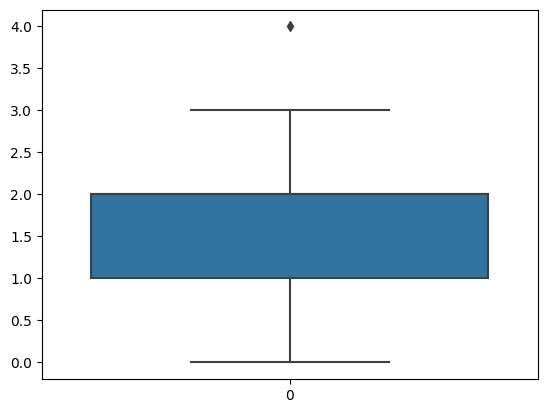

In [241]:
## using boxplot for outlier detection
sns.boxplot(df['er_status'])

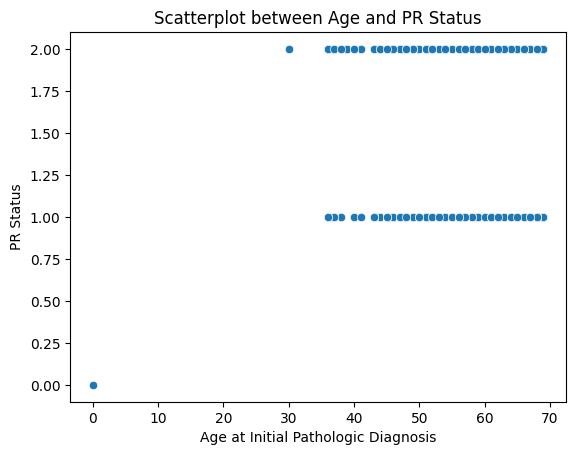

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='age_at_initial_pathologic_diagnosis', y='pr_status', data=df)
plt.xlabel('Age at Initial Pathologic Diagnosis')
plt.ylabel('PR Status')
plt.title('Scatterplot between Age and PR Status')
plt.show()


C:\Users\HPHH\AppData\Local\Temp\ipykernel_11048\2145990178.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=df['pr_status'],y=df['age_at_initial_pathologic_diagnosis'],hue=df['gender'], palette=['green','red'],data=df)


<Axes: xlabel='pr_status', ylabel='age_at_initial_pathologic_diagnosis'>

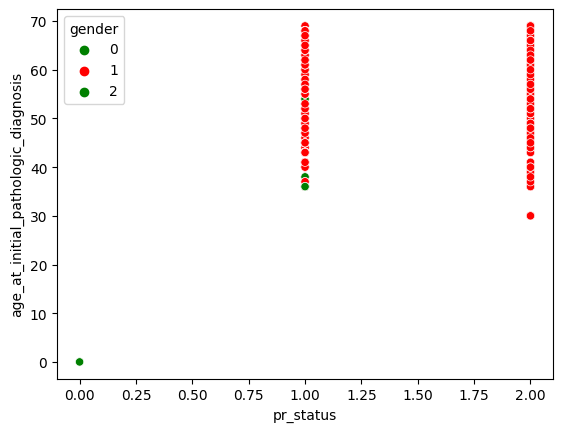

In [243]:
#scatter plot
sns.scatterplot(x=df['pr_status'],y=df['age_at_initial_pathologic_diagnosis'],hue=df['gender'], palette=['green','red'],data=df)

#### using Interquartile Range (IQR)
+ H-Spread/Mid_spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [244]:
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)


In [245]:
IQR = q3 - q1

In [246]:
IQR

patient_id                             2609.50
gender                                    0.00
age_at_initial_pathologic_diagnosis      14.25
er_status                                 1.00
pr_status                                 1.00
her2_final_status                         1.00
tumor                                     0.00
tumor_t1_coded                            0.00
node                                      1.00
node_coded                                1.00
metastasis                                0.00
metastasis_coded                          0.00
ajcc_stage                                3.00
converted_stage                           4.00
survival_data_form                        1.00
vital_status                              0.00
days_to_date_of_last_contact           1058.00
days_to_date_of_death                     0.00
os_event                                  0.00
os_time                                1075.00
smoker                                    0.00
hvyalcoholcon

In [247]:
import pandas as pd

# Assuming you have a DataFrame called 'df'

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Define the outlier detection threshold (e.g., 1.5 times the IQR)
threshold = 1.5

# Create an empty DataFrame to store the outliers
outliers_df = pd.DataFrame()

# Iterate through each numerical column
for col in numerical_columns.columns:
    q1 = numerical_columns[col].quantile(0.25)
    q3 = numerical_columns[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - threshold * IQR
    upper_bound = q3 + threshold * IQR
    
    # Identify outliers for the current column and create a boolean mask
    column_outliers = (numerical_columns[col] < lower_bound) | (numerical_columns[col] > upper_bound)
    
    # Append the boolean mask to the outliers_df
    outliers_df[col] = column_outliers

# Display the DataFrame containing True/False for outliers
print(outliers_df)


     patient_id  gender  age_at_initial_pathologic_diagnosis  er_status  \
0         False   False                                False      False   
1         False   False                                False      False   
2         False   False                                False      False   
3         False   False                                False      False   
4         False   False                                False      False   
..          ...     ...                                  ...        ...   
775       False   False                                False      False   
776       False   False                                False      False   
777       False   False                                False      False   
778       False   False                                False      False   
779       False    True                                 True      False   

     pr_status  her2_final_status  tumor  tumor_t1_coded   node  node_coded  \
0        False      

#### Narative
+ The data points with true are the outliers

#### solution
+ remove
+ change
+ ignore

In [248]:
# Get the IQR for numeric columns only
numeric_cols = df.select_dtypes(include=['number'])
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
IQR = q3 - q1

# Define a boolean mask for outliers
outliers_mask = ((numeric_cols < (q1 - 1.5 * IQR)) | (numeric_cols > (q3 + 1.5 * IQR))).any(axis=1)

# Filter the DataFrame to exclude rows with outliers
df_no_outlier = df[~outliers_mask]


In [249]:
df_no_outlier

,patient_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,...,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,smoker,hvyalcoholconsump,bmi,physhlth,highbp,veggies
5,10.0,1,48.0,1,1,1,2,2,1,1,...,309.0,0.0,0.0,309.0,0.0,0.0,25.0,2.0,1.0,1.0
7,22.0,1,61.0,1,1,1,2,2,1,1,...,643.0,0.0,0.0,643.0,0.0,0.0,25.0,0.0,1.0,1.0
9,35.0,1,45.0,1,1,1,2,2,1,1,...,964.0,0.0,0.0,964.0,0.0,0.0,24.0,0.0,0.0,1.0
10,36.0,1,48.0,1,1,1,2,2,1,1,...,1027.0,0.0,0.0,1027.0,0.0,0.0,25.0,0.0,0.0,1.0
13,46.0,1,41.0,1,1,1,2,2,1,1,...,1471.0,0.0,0.0,1471.0,0.0,0.0,28.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,4000.0,1,52.0,2,2,2,2,2,1,1,...,1641.0,0.0,0.0,1641.0,0.0,0.0,22.0,0.0,0.0,1.0
770,4004.0,1,68.0,1,1,2,2,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,1.0
773,4010.0,1,66.0,1,2,2,2,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,3.0,0.0,1.0
776,4015.0,1,48.0,2,1,2,2,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,1.0


In [250]:
print(df.shape)
print(df_no_outlier.shape)

(780, 26)
(205, 26)


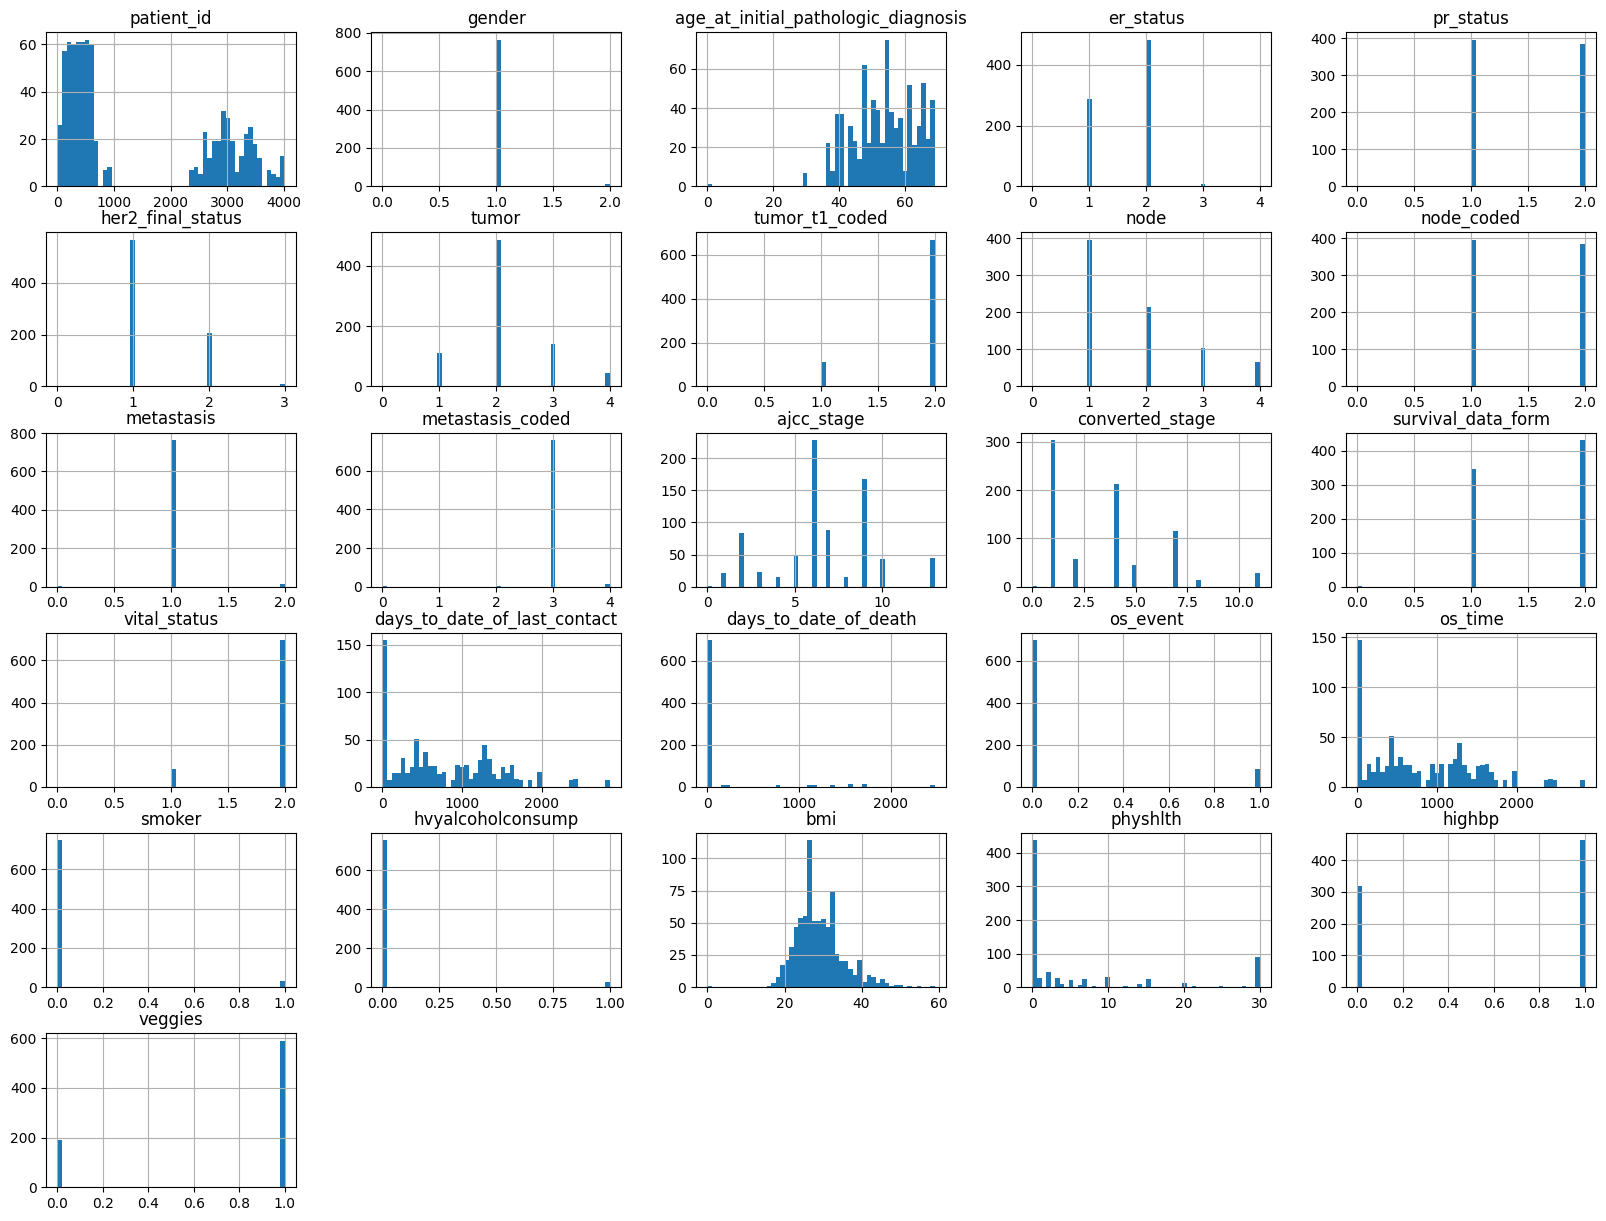

In [251]:
### plot the distribution of data
df.hist(bins=50, figsize=(20, 15))
plt.show()

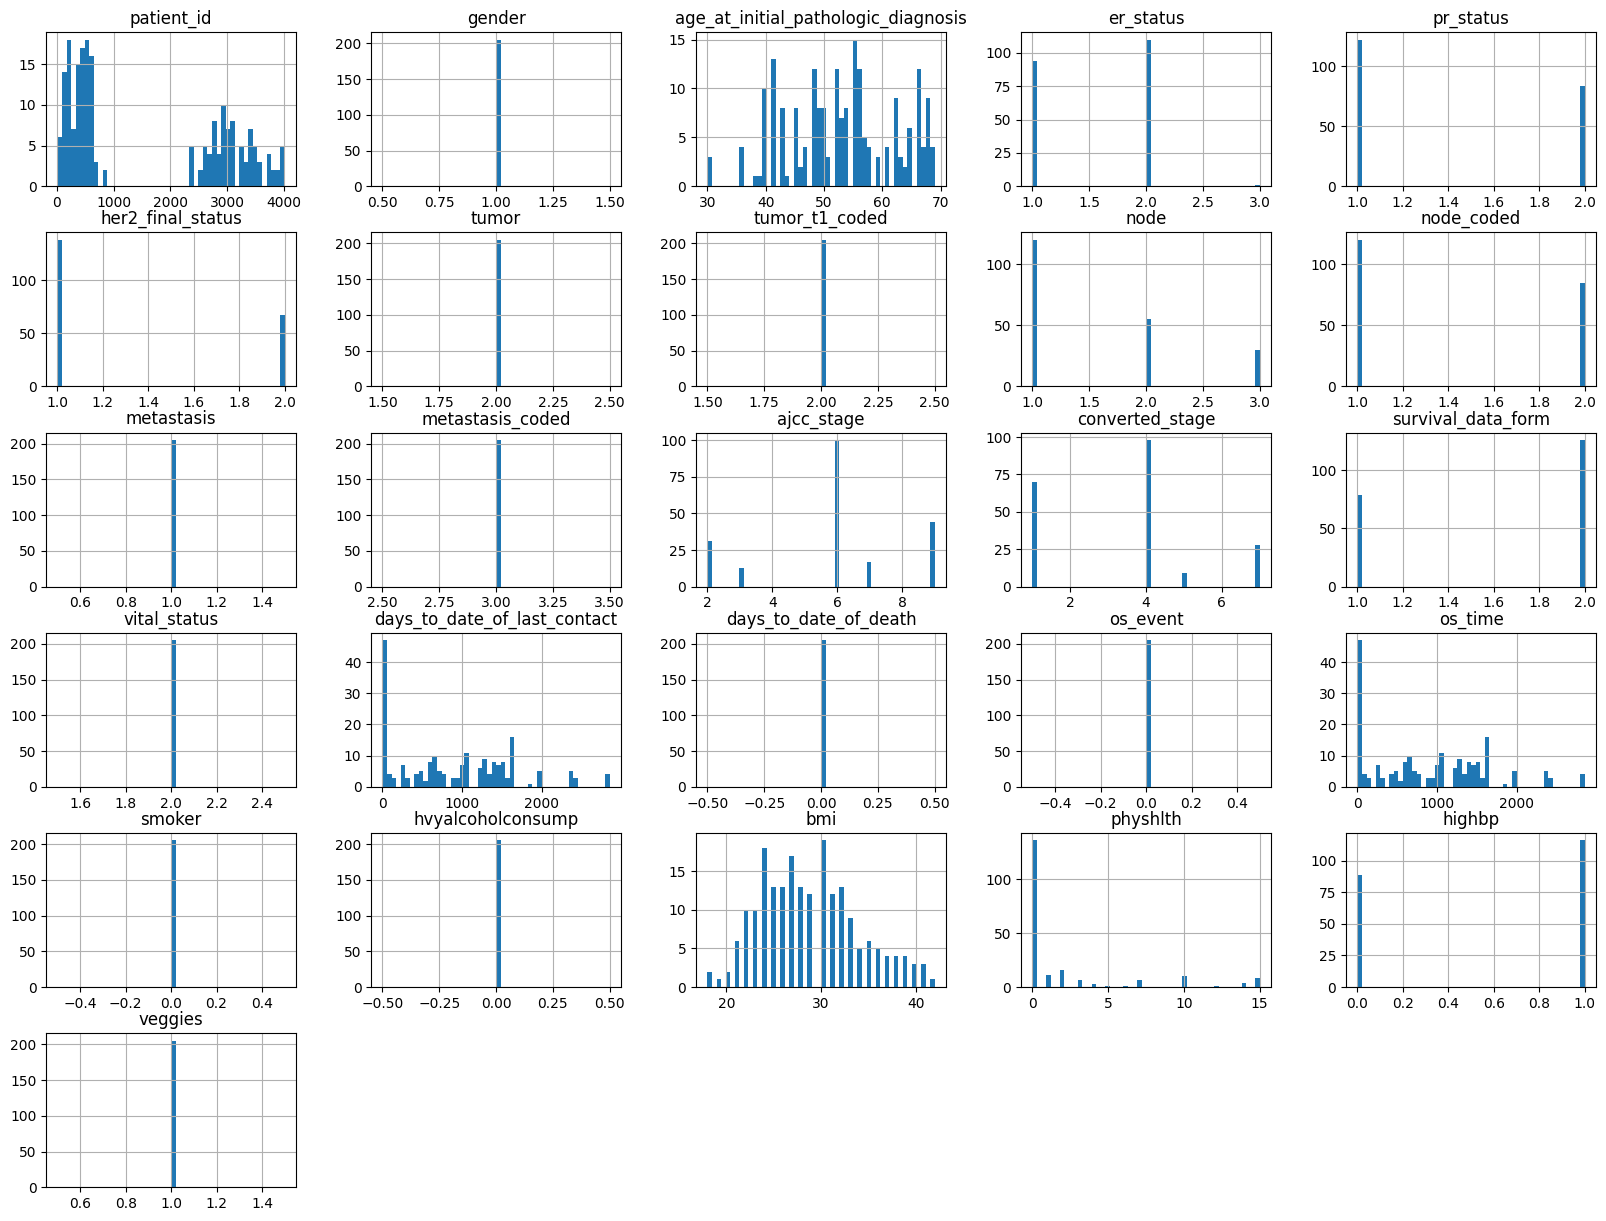

In [252]:
### plot of distribution of data
df_no_outlier.hist(bins=50, figsize=(20,15))
plt.show()

#### Feature selection and importance
+ selectkbest
  - strong relation with the output/target
+ Recursive Feature Elimination

In [253]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [254]:
# Features and Lables
df.head()

,patient_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,...,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,smoker,hvyalcoholconsump,bmi,physhlth,highbp,veggies
0,0.0,1,40.0,1,1,1,3,2,4,2,...,240.0,240.0,1.0,240.0,1.0,0.0,40.0,15.0,1.0,1.0
1,2.0,1,48.0,1,1,1,2,2,1,1,...,754.0,754.0,1.0,754.0,1.0,0.0,25.0,0.0,0.0,0.0
2,5.0,1,56.0,1,1,1,2,2,2,2,...,1555.0,1555.0,1.0,1555.0,0.0,0.0,28.0,30.0,1.0,0.0
3,6.0,1,38.0,1,1,1,2,2,2,2,...,1692.0,1692.0,1.0,1692.0,0.0,0.0,27.0,0.0,1.0,1.0
4,8.0,1,57.0,1,1,1,3,2,4,2,...,133.0,0.0,0.0,133.0,0.0,0.0,24.0,0.0,1.0,1.0


In [255]:
df.columns

Index(['patient_id', 'gender', 'age_at_initial_pathologic_diagnosis',
       'er_status', 'pr_status', 'her2_final_status', 'tumor',
       'tumor_t1_coded', 'node', 'node_coded', 'metastasis',
       'metastasis_coded', 'ajcc_stage', 'converted_stage',
       'survival_data_form', 'vital_status', 'days_to_date_of_last_contact',
       'days_to_date_of_death', 'os_event', 'os_time', 'smoker',
       'hvyalcoholconsump', 'bmi', 'physhlth', 'highbp', 'veggies'],
      dtype='object')

In [256]:
xfeatures = df[['patient_id', 'gender', 'age_at_initial_pathologic_diagnosis','er_status', 'pr_status', 'her2_final_status', 'tumor',
       'tumor_t1_coded', 'node', 'node_coded', 'metastasis',
       'metastasis_coded', 'ajcc_stage', 'converted_stage',
       'survival_data_form', 'days_to_date_of_last_contact',
       'days_to_date_of_death', 'os_event', 'os_time', 'smoker',
       'hvyalcoholconsump', 'bmi', 'physhlth', 'highbp', 'veggies',
       ]]
ylables = df['vital_status']

In [257]:
#using skbest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures, ylables)

In [258]:
#higest score shows the best fit
print("Scores",best_feature_fit.scores_)

Scores [1.45164602e+03 1.10142549e+00 5.37019817e+01 1.74577678e+00
 2.75363023e+00 2.07181705e+00 2.26133990e+00 2.87423444e+00
 6.38916606e+00 5.14175819e+00 3.39856150e+00 3.05301734e+00
 1.77226651e+01 7.44552355e+01 1.97672509e+00 5.09437749e+03
 8.57687892e+05 6.97000000e+02 2.14847372e+04 7.74943032e-01
 5.47361861e-02 2.90880111e+01 2.19799123e+01 5.94216993e-01
 7.70647758e-01]


In [259]:
# Transform(opitional)
bf_02 = best_feature_fit.transform(xfeatures)

In [260]:
bf_02

array([[0.000e+00, 4.000e+01, 4.000e+00, ..., 2.400e+02, 4.000e+01,
        1.500e+01],
       [2.000e+00, 4.800e+01, 6.000e+00, ..., 7.540e+02, 2.500e+01,
        0.000e+00],
       [5.000e+00, 5.600e+01, 9.000e+00, ..., 1.555e+03, 2.800e+01,
        3.000e+01],
       ...,
       [4.017e+03, 6.700e+01, 3.000e+00, ..., 7.000e+00, 4.100e+01,
        0.000e+00],
       [4.018e+03, 5.200e+01, 2.000e+00, ..., 1.600e+02, 2.500e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [261]:
## Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [262]:
feature_scores

,Feature_Scores
0,1451.646023
1,1.101425
2,53.701982
3,1.745777
4,2.753630
5,2.071817
6,2.261340
7,2.874234
8,6.389166
9,5.141758


In [263]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [264]:
best_feat_df

,Feature_Scores,Feature_name
0,1451.646023,patient_id
1,1.101425,gender
2,53.701982,age_at_initial_pathologic_diagnosis
3,1.745777,er_status
4,2.753630,pr_status
5,2.071817,her2_final_status
6,2.261340,tumor
7,2.874234,tumor_t1_coded
8,6.389166,node
9,5.141758,node_coded


In [265]:
## Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(10 ,'Feature_Scores')

,Feature_Scores,Feature_name
16,857687.891566,days_to_date_of_death
18,21484.737194,os_time
15,5094.377488,days_to_date_of_last_contact
0,1451.646023,patient_id
17,697.000000,os_event
13,74.455235,converted_stage
2,53.701982,age_at_initial_pathologic_diagnosis
21,29.088011,bmi
22,21.979912,physhlth
12,17.722665,ajcc_stage


In [266]:
best_feat_df.nlargest(12 ,'Feature_Scores')

,Feature_Scores,Feature_name
16,857687.891566,days_to_date_of_death
18,21484.737194,os_time
15,5094.377488,days_to_date_of_last_contact
0,1451.646023,patient_id
17,697.000000,os_event
13,74.455235,converted_stage
2,53.701982,age_at_initial_pathologic_diagnosis
21,29.088011,bmi
22,21.979912,physhlth
12,17.722665,ajcc_stage


In [267]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['days_to_date_of_death', 'os_time', 'days_to_date_of_last_contact',
       'patient_id', 'os_event', 'converted_stage',
       'age_at_initial_pathologic_diagnosis', 'bmi', 'physhlth',
       'ajcc_stage', 'node', 'node_coded'], dtype=object)

### Recursive Feature Elimination

In [268]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [269]:
logit = LogisticRegression()

In [270]:
rfe = RFE(estimator=logit, n_features_to_select=8)

In [271]:
rfe_fit= rfe.fit(xfeatures, ylables)

C:\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\m

In [272]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [273]:
rfe_feature_df = pd.concat([feature_column_names, selected_features,ranking_features],axis=1)

In [274]:
rfe_feature_df

,Feature_name,Selected_Features,ranking_Features
0,patient_id,True,1
1,gender,False,12
2,age_at_initial_pathologic_diagnosis,True,1
3,er_status,False,10
4,pr_status,False,11
5,her2_final_status,False,8
6,tumor,False,4
7,tumor_t1_coded,False,7
8,node,False,5
9,node_coded,False,9


### Narative 
+ RFE i will eliminate the lowest rating or true

#### checking for Feature Importance
+ ExtraTreeClassifier
+ Which feature is Important

In [275]:
from sklearn.ensemble import ExtraTreesClassifier

In [276]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylables)

print("Extra Trees Classifier Model Summary:")
print("Number of features:", len(et_clf.feature_importances_))
print("Feature importances:", et_clf.feature_importances_)

Extra Trees Classifier Model Summary:
Number of features: 25
Feature importances: [5.21639516e-04 1.63910628e-03 1.66064180e-03 1.01356254e-02
 2.64153116e-03 2.91026623e-03 3.55478966e-03 4.04226835e-03
 4.31255672e-03 7.26635793e-03 4.91026516e-02 6.38928889e-03
 8.93260938e-03 8.32462816e-03 6.58698794e-03 8.11538907e-03
 2.83785976e-01 5.78718247e-01 8.49506070e-03 2.36365115e-04
 3.04959571e-04 1.26719040e-03 3.54500326e-04 3.66174250e-04
 3.35189000e-04]


In [277]:
## print Important
print(et_clf.feature_importances_)

[5.21639516e-04 1.63910628e-03 1.66064180e-03 1.01356254e-02
 2.64153116e-03 2.91026623e-03 3.55478966e-03 4.04226835e-03
 4.31255672e-03 7.26635793e-03 4.91026516e-02 6.38928889e-03
 8.93260938e-03 8.32462816e-03 6.58698794e-03 8.11538907e-03
 2.83785976e-01 5.78718247e-01 8.49506070e-03 2.36365115e-04
 3.04959571e-04 1.26719040e-03 3.54500326e-04 3.66174250e-04
 3.35189000e-04]


In [278]:
feature_importance_df = pd.Series(et_clf.feature_importances_,index=xfeatures.columns)

In [279]:
feature_importance_df

patient_id                             0.000522
gender                                 0.001639
age_at_initial_pathologic_diagnosis    0.001661
er_status                              0.010136
pr_status                              0.002642
her2_final_status                      0.002910
tumor                                  0.003555
tumor_t1_coded                         0.004042
node                                   0.004313
node_coded                             0.007266
metastasis                             0.049103
metastasis_coded                       0.006389
ajcc_stage                             0.008933
converted_stage                        0.008325
survival_data_form                     0.006587
days_to_date_of_last_contact           0.008115
days_to_date_of_death                  0.283786
os_event                               0.578718
os_time                                0.008495
smoker                                 0.000236
hvyalcoholconsump                      0

<Axes: >

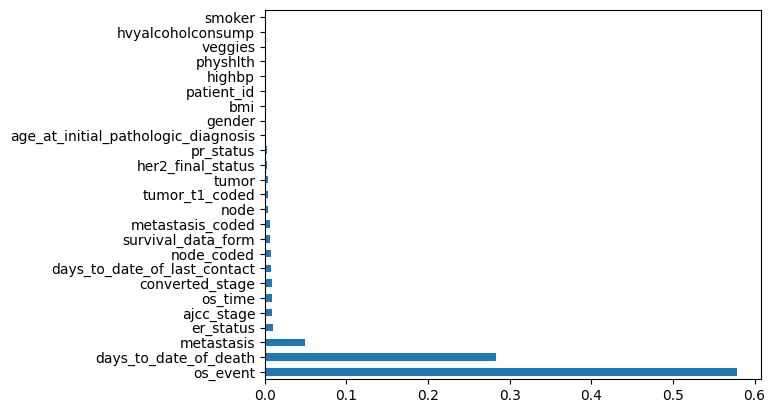

In [280]:
feature_importance_df.nlargest(26).plot(kind='barh')

#### Narative
+ All the methods gave me almost the same features to use

In [281]:
# Corrolation
df.corr()

,patient_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,...,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,smoker,hvyalcoholconsump,bmi,physhlth,highbp,veggies
patient_id,1.000000,0.022308,0.020171,0.025515,0.007796,0.033043,0.011820,0.017166,0.009969,0.013845,...,-0.003882,-0.002409,-0.004889,-0.001609,-0.096040,-0.021251,0.062919,-0.028043,-0.016545,0.031078
gender,0.022308,1.000000,-0.053602,-0.024631,-0.006796,-0.013382,0.065671,0.101699,0.063641,0.085562,...,0.003779,0.054420,0.079023,-0.001381,0.020819,-0.022481,0.026143,0.003431,-0.032216,-0.018079
age_at_initial_pathologic_diagnosis,0.020171,-0.053602,1.000000,0.059214,-0.002968,0.133020,0.002575,0.011210,0.023127,0.044008,...,-0.080460,-0.023728,0.001168,-0.088715,0.003507,0.033070,0.030917,0.034036,0.040613,-0.026375
er_status,0.025515,-0.024631,0.059214,1.000000,0.688068,-0.005018,0.094921,0.025293,0.116485,0.179939,...,0.030229,0.054643,0.030045,0.059078,-0.014926,0.018191,0.023959,-0.078767,-0.065152,-0.005627
pr_status,0.007796,-0.006796,-0.002968,0.688068,1.000000,-0.060275,0.083201,-0.047782,0.004901,0.063111,...,0.115062,-0.072723,-0.096389,0.120783,-0.014724,0.060649,0.045786,-0.079903,-0.027320,0.024082
her2_final_status,0.033043,-0.013382,0.133020,-0.005018,-0.060275,1.000000,-0.052082,0.022872,0.196849,0.244039,...,-0.027108,-0.055040,-0.074462,-0.042509,-0.031475,-0.005507,-0.002639,-0.026406,0.011521,-0.019889
tumor,0.011820,0.065671,0.002575,0.094921,0.083201,-0.052082,1.000000,0.652784,0.225225,0.061588,...,-0.168724,-0.052372,-0.023060,-0.170642,0.001924,-0.037077,-0.027061,-0.026405,-0.039304,0.006280
tumor_t1_coded,0.017166,0.101699,0.011210,0.025293,-0.047782,0.022872,0.652784,1.000000,0.140664,0.082413,...,0.038799,0.122795,0.140589,0.054222,-0.003927,-0.044856,-0.006038,-0.029027,-0.029855,-0.063210
node,0.009969,0.063641,0.023127,0.116485,0.004901,0.196849,0.225225,0.140664,1.000000,0.833992,...,-0.100366,0.029850,0.106470,-0.120885,-0.027969,0.009542,-0.040301,-0.093469,-0.039742,-0.011451
node_coded,0.013845,0.085562,0.044008,0.179939,0.063111,0.244039,0.061588,0.082413,0.833992,1.000000,...,-0.022466,0.097951,0.167511,-0.050063,-0.002584,0.045958,-0.007906,-0.083173,-0.009625,-0.004191


<Axes: >

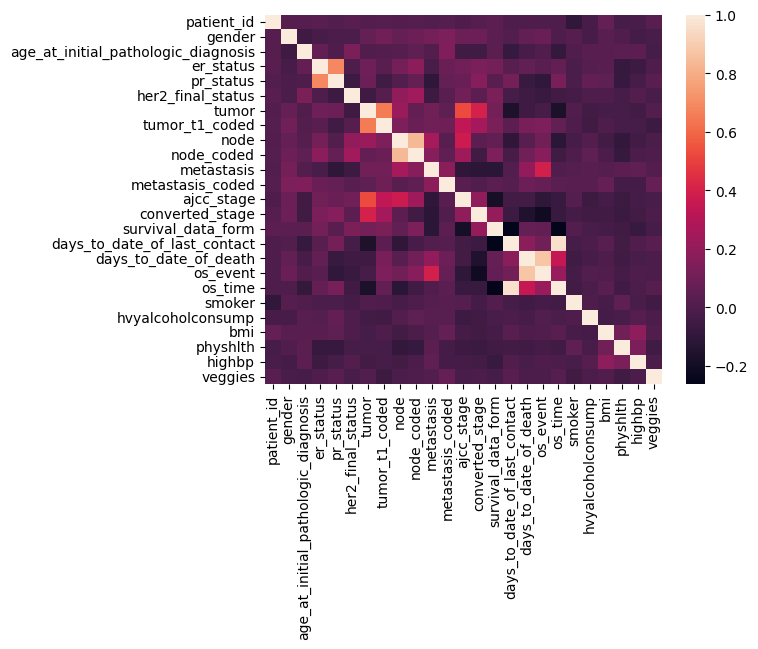

In [282]:
# Heatmap for Corrolation
sns.heatmap(xfeatures.corr())

<Axes: >

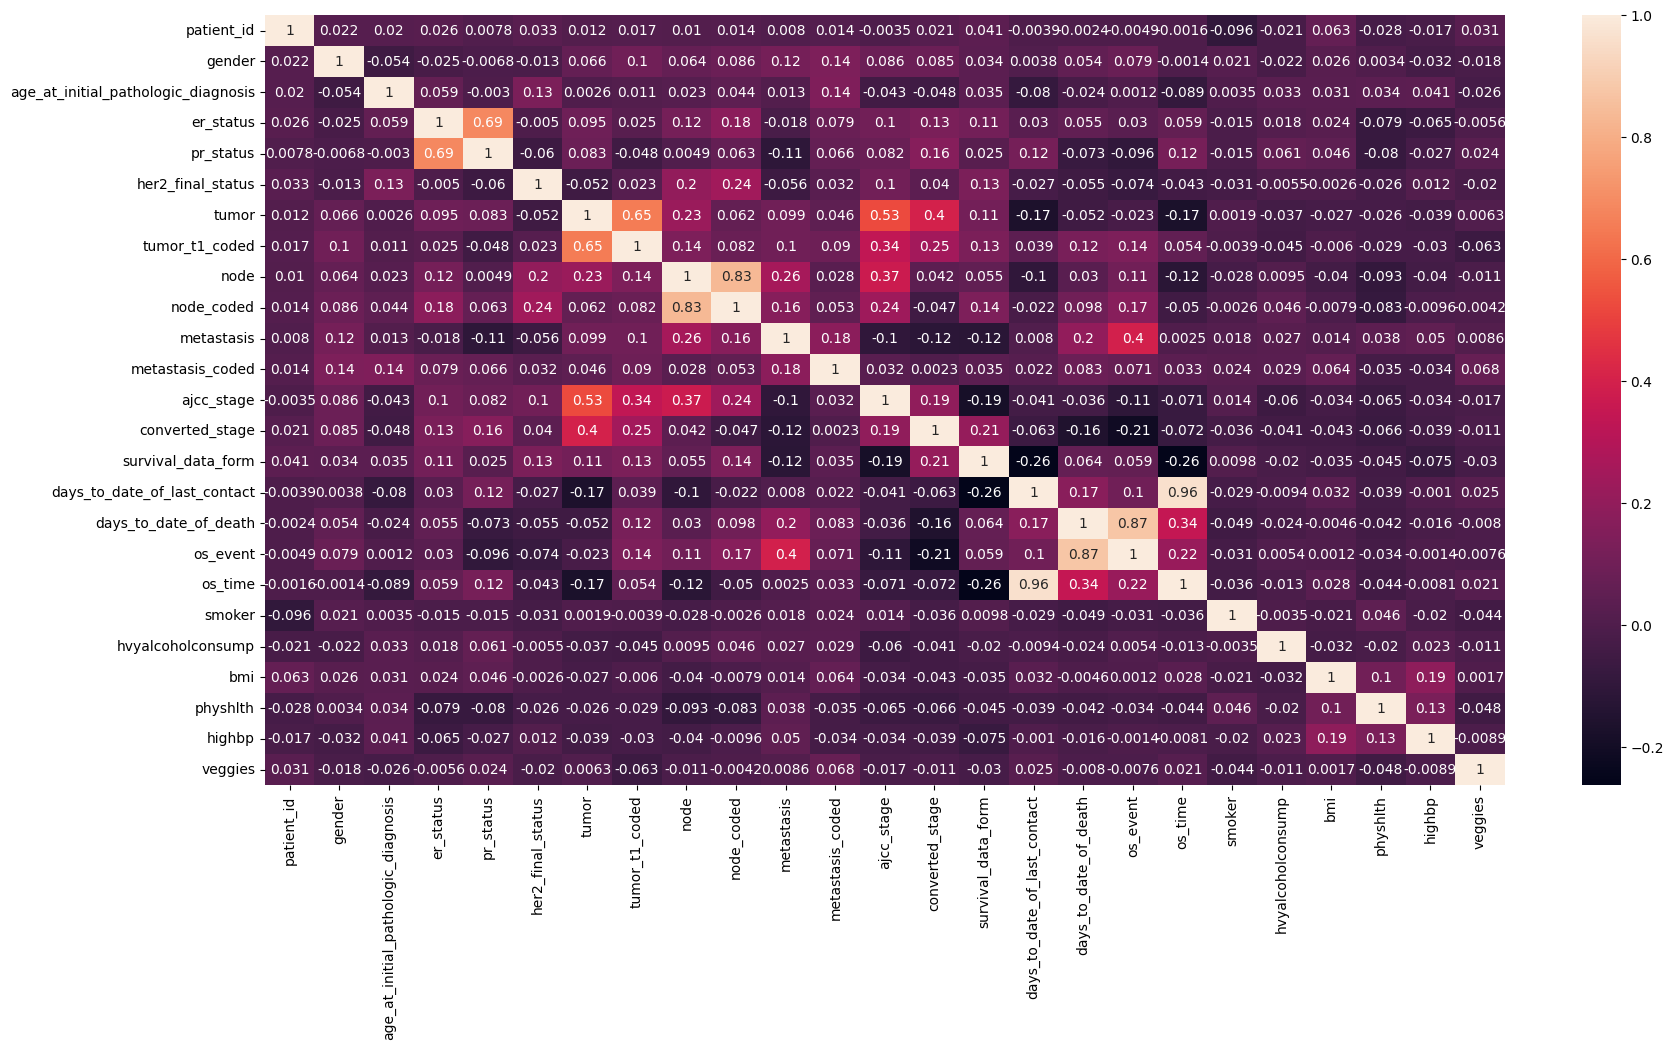

In [283]:
# Heatmap for Correlationn with Annot
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot=True)

### Model Building
+ Feature & Labels
+ Train/Test/Split
+ LogisticRegression
+ Random Forest
+ decision Tree
+ Serialize

In [284]:
# ML PKG
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [285]:
# Features for Initial Data
df.columns

Index(['patient_id', 'gender', 'age_at_initial_pathologic_diagnosis',
       'er_status', 'pr_status', 'her2_final_status', 'tumor',
       'tumor_t1_coded', 'node', 'node_coded', 'metastasis',
       'metastasis_coded', 'ajcc_stage', 'converted_stage',
       'survival_data_form', 'vital_status', 'days_to_date_of_last_contact',
       'days_to_date_of_death', 'os_event', 'os_time', 'smoker',
       'hvyalcoholconsump', 'bmi', 'physhlth', 'highbp', 'veggies'],
      dtype='object')

In [286]:
xfeatures

,patient_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor_t1_coded,node,node_coded,...,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,smoker,hvyalcoholconsump,bmi,physhlth,highbp,veggies
0,0.0,1,40.0,1,1,1,3,2,4,2,...,240.0,240.0,1.0,240.0,1.0,0.0,40.0,15.0,1.0,1.0
1,2.0,1,48.0,1,1,1,2,2,1,1,...,754.0,754.0,1.0,754.0,1.0,0.0,25.0,0.0,0.0,0.0
2,5.0,1,56.0,1,1,1,2,2,2,2,...,1555.0,1555.0,1.0,1555.0,0.0,0.0,28.0,30.0,1.0,0.0
3,6.0,1,38.0,1,1,1,2,2,2,2,...,1692.0,1692.0,1.0,1692.0,0.0,0.0,27.0,0.0,1.0,1.0
4,8.0,1,57.0,1,1,1,3,2,4,2,...,133.0,0.0,0.0,133.0,0.0,0.0,24.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,4012.0,1,62.0,1,2,3,3,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,1.0
776,4015.0,1,48.0,2,1,2,2,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,1.0
777,4017.0,1,67.0,2,1,2,2,2,3,2,...,7.0,0.0,0.0,7.0,0.0,0.0,41.0,0.0,1.0,1.0
778,4018.0,1,52.0,2,2,1,2,2,2,2,...,21.0,160.0,1.0,160.0,0.0,0.0,25.0,0.0,0.0,1.0


In [287]:
ylabels =df['vital_status']

In [288]:
# Selected Features
df.columns

Index(['patient_id', 'gender', 'age_at_initial_pathologic_diagnosis',
       'er_status', 'pr_status', 'her2_final_status', 'tumor',
       'tumor_t1_coded', 'node', 'node_coded', 'metastasis',
       'metastasis_coded', 'ajcc_stage', 'converted_stage',
       'survival_data_form', 'vital_status', 'days_to_date_of_last_contact',
       'days_to_date_of_death', 'os_event', 'os_time', 'smoker',
       'hvyalcoholconsump', 'bmi', 'physhlth', 'highbp', 'veggies'],
      dtype='object')

In [289]:
xfeatures_best = df[[ 'gender','age_at_initial_pathologic_diagnosis','er_status', 'pr_status', 'her2_final_status', 'tumor','tumor_t1_coded', 'node', 'node_coded', 'metastasis','metastasis_coded', 'ajcc_stage', 'converted_stage',
       'survival_data_form', 'days_to_date_of_last_contact','days_to_date_of_death', 'os_event', 'os_time', 'smoker','hvyalcoholconsump', 'bmi', 'physhlth', 'highbp', 'veggies']]

In [290]:
# train/ test dataset
x_train,x_test,y_train,y_test = train_test_split(xfeatures, ylabels,test_size=0.30,random_state=7)

In [291]:
# train/ test dataset for best feactures
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(xfeatures_best, ylabels,test_size=0.30,random_state=7)

In [292]:
# Building Model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [293]:
# Model Accuracy
# Method 1
logreg.score(x_test,y_test)

0.9957264957264957

In [294]:
# Method 2
logreg.predict(x_test)

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [295]:
print(list(y_test))

[1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2]


In [296]:
accuracy_score(y_test,logreg.predict(x_test))

0.9957264957264957

In [297]:
# Building Model
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)

LogisticRegression()

In [298]:
# Model Accuracy
# Method 1
model_logit.score(x_test_b,y_test_b)

0.9957264957264957

In [299]:
#### single prediction
x_test.iloc[1]

patient_id                             2993.0
gender                                    1.0
age_at_initial_pathologic_diagnosis      41.0
er_status                                 2.0
pr_status                                 2.0
her2_final_status                         1.0
tumor                                     2.0
tumor_t1_coded                            2.0
node                                      1.0
node_coded                                1.0
metastasis                                1.0
metastasis_coded                          3.0
ajcc_stage                                6.0
converted_stage                           4.0
survival_data_form                        1.0
days_to_date_of_last_contact           1547.0
days_to_date_of_death                     0.0
os_event                                  0.0
os_time                                1547.0
smoker                                    0.0
hvyalcoholconsump                         0.0
bmi                               

In [300]:
res_dic = {"DECEASED':1, 'LIVING': 2"}
x1 = x_test.iloc[1]

In [301]:
# Reshaping 
logreg.predict(np.array(x1).reshape(1,-1))

C:\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

### Alternative Alogorithms

In [302]:
from sklearn.ensemble import RandomForestClassifier


In [303]:
RF = RandomForestClassifier()

In [304]:
RF.fit(x_train_b,y_train_b)

RandomForestClassifier()

In [305]:
# Model Accuraccy Score
RF.score(x_test_b,y_test_b)

0.9957264957264957

In [306]:
clf = DecisionTreeClassifier()

In [307]:
# Fit
clf.fit(x_train_b,y_train_b)

DecisionTreeClassifier()

In [308]:
# Model Accuraccy Score
clf.score(x_test_b,y_test_b)

0.9957264957264957

In [309]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [310]:
knn = KNeighborsClassifier(n_neighbors=3)

In [311]:
#Fit
knn.fit(x_train_b,y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [312]:
from sklearn.metrics import accuracy_score

# Assuming you have already created and fitted your KNeighborsClassifier model (knn)

# Ensure that x_test_b is in the correct format (e.g., NumPy array)
# Convert it to the correct format if needed
x_test_b = x_test_b.values if isinstance(x_test_b, pd.DataFrame) else x_test_b

# Make predictions on the test data
y_pred = knn.predict(x_test_b)

# Calculate the accuracy score
accuracy = accuracy_score(y_test_b, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9957264957264957


C:\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Save my model
+ Serialization
+ Pickle
+ joblib
+ numpy/json/ray

In [313]:
# using Joblib
import joblib
import pickle

In [314]:
model_file = open("logistic_regression_Bcancer_model.pkl","wb")
joblib.dump(model_logit,model_file)
model_file.close()

In [315]:
model_file_knn = open("knn_Bcancer_model.pkl","wb")
joblib.dump(knn ,model_file_knn)
model_file.close()

In [316]:
model_file_clf = open("decision_tree_clf_Bcancer.pkl","wb")
joblib.dump(clf ,model_file_clf)
model_file.close()

In [317]:
model_file_RF = open(" RandomForestClassifier_Bcancer_model.pickle","wb")
joblib.dump(RF ,model_file_RF)
model_file.close()

In [318]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [319]:
feature_names_best = xfeatures_best.columns

In [320]:
target_names = ['Die', 'Live']

In [321]:
# Create A Dot plot
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_names_best, class_names = target_names)

In [322]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

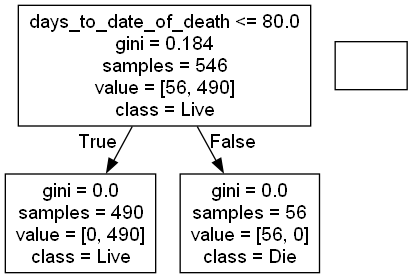

In [323]:
Image(graph.create_png())

In [324]:
# save the plot
graph.write_png("Bcancer_decision_tree_plot.png")

True

### Interpret Model AND Evaluate
+ Eli5
+ SHAP
+ skater

In [325]:
# Interpreting with lime
import lime
import lime.lime_tabular

In [326]:
# Methods and attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

# create Lime Explainer
+ TabularExplainer = Tables
+ TextExplainer = Text
+ LimeImage Explainer= Images

In [327]:
feature_names_best

Index(['gender', 'age_at_initial_pathologic_diagnosis', 'er_status',
       'pr_status', 'her2_final_status', 'tumor', 'tumor_t1_coded', 'node',
       'node_coded', 'metastasis', 'metastasis_coded', 'ajcc_stage',
       'converted_stage', 'survival_data_form', 'days_to_date_of_last_contact',
       'days_to_date_of_death', 'os_event', 'os_time', 'smoker',
       'hvyalcoholconsump', 'bmi', 'physhlth', 'highbp', 'veggies'],
      dtype='object')

In [328]:
target_names

['Die', 'Live']

In [329]:
class_name = ["Die(1)","live(2)"]

In [330]:
x1

patient_id                             2993.0
gender                                    1.0
age_at_initial_pathologic_diagnosis      41.0
er_status                                 2.0
pr_status                                 2.0
her2_final_status                         1.0
tumor                                     2.0
tumor_t1_coded                            2.0
node                                      1.0
node_coded                                1.0
metastasis                                1.0
metastasis_coded                          3.0
ajcc_stage                                6.0
converted_stage                           4.0
survival_data_form                        1.0
days_to_date_of_last_contact           1547.0
days_to_date_of_death                     0.0
os_event                                  0.0
os_time                                1547.0
smoker                                    0.0
hvyalcoholconsump                         0.0
bmi                               

In [331]:
x_test_b[1]

array([1.000e+00, 4.100e+01, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
       2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 6.000e+00,
       4.000e+00, 1.000e+00, 1.547e+03, 0.000e+00, 0.000e+00, 1.547e+03,
       0.000e+00, 0.000e+00, 3.400e+01, 1.000e+00, 0.000e+00, 1.000e+00])

In [332]:
model_logit.predict(np.array(x_test_b[1]).reshape(1,-1))

C:\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [333]:
# # create Explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.value,feature_names=feature_names_best,class_names=class_names,discretize_continous=True)

# Create the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train_b.values,  # Use .values to convert the DataFrame to a NumPy array
    mode="classification",  # Specify the mode, e.g., classification or regression
    training_labels=y_train_b,
    feature_names=feature_names_best,
    class_names=class_name,
    discretize_continuous=True
)

In [334]:
exp = explainer.explain_instance(x_test_b[1],model_logit.predict_proba,num_features=24,top_labels=1)

C:\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [335]:
exp.show_in_notebook(show_table=True,show_all=False)

In [336]:
# Explanation as list
exp.as_list()

[('days_to_date_of_death <= 0.00', 0.6082578694289837),
 ('os_time > 1302.50', -0.5149326885370985),
 ('days_to_date_of_last_contact > 1283.50', 0.37202190951846725),
 ('hvyalcoholconsump <= 0.00', -0.06181526179893598),
 ('smoker <= 0.00', 0.05151108311701717),
 ('metastasis <= 1.00', -0.03867532114645121),
 ('metastasis_coded <= 3.00', 0.03004918080937767),
 ('gender <= 1.00', 0.030039722379192873),
 ('os_event <= 0.00', 0.028218759524557113),
 ('1.00 < er_status <= 2.00', 0.014195326367303345),
 ('bmi > 32.00', 0.010509129501817519),
 ('node_coded <= 1.00', 0.009223948597430188),
 ('ajcc_stage <= 6.00', 0.009000098811947955),
 ('1.00 < converted_stage <= 4.00', -0.00868188466170482),
 ('her2_final_status <= 1.00', 0.008067734055517257),
 ('node <= 1.00', -0.0073918396210304795),
 ('1.00 < pr_status <= 2.00', 0.0072339917500508265),
 ('tumor <= 2.00', -0.004853814581139451),
 ('0.00 < physhlth <= 7.00', 0.004141090987641465),
 ('highbp <= 0.00', 0.0027984850603143875),
 ('age_at_init

#### Evaluation of model
+ confusion Matrix
+ Classification Report
+ Accuracy core

In [337]:
from sklearn.metrics import confusion_matrix

In [338]:
y_pred = model_logit.predict(x_test_b)

C:\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [339]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.9957264957264957

In [340]:
## using confusion matrix
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1],
       [  0,  27,   0],
       [  0,   0, 206]], dtype=int64)

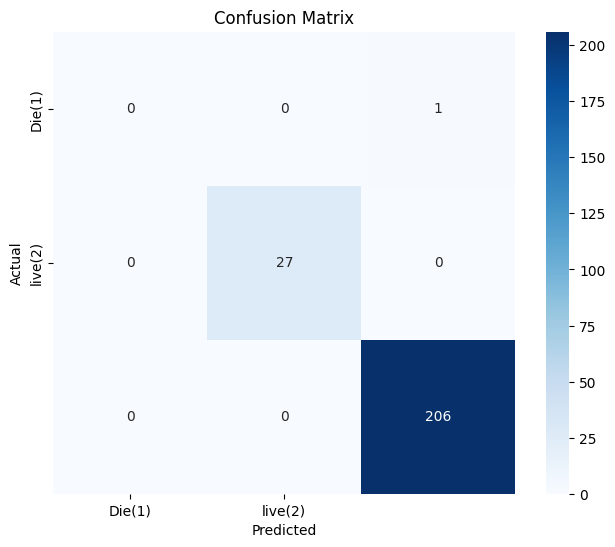

In [341]:
# plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have your predicted labels 'y_pred' and true labels 'y_test_b'
cm = confusion_matrix(y_test_b, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=class_name, yticklabels=class_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [342]:
### classification report
from sklearn.metrics import classification_report

In [343]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00       206

    accuracy                           1.00       234
   macro avg       0.67      0.67      0.67       234
weighted avg       0.99      1.00      0.99       234



C:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [344]:
### ALT :pandas_ml

In [345]:
class_name

['Die(1)', 'live(2)']

In [346]:
# print(classification_report(y_test,y_pred,target_names=class_name))
from sklearn.utils.multiclass import unique_labels

labels = unique_labels(y_test, y_pred)
print(classification_report(y_test, y_pred, labels=labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00       206

    accuracy                           1.00       234
   macro avg       0.67      0.67      0.67       234
weighted avg       0.99      1.00      0.99       234



C:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
